**Try the algo on Same Whether dataset- LabelEncoding of features: and Train test Division 90%-10%**


In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-Lab/L03/Datasets/Dataset2.csv')

print('\nData :- \n', data)


Data :- 
    Outlook Temp Wind Humidity Class
0        R    H    F   Normal     N
1        R    H    T     High     N
2        O    H    F   Normal     Y
3        S    M    F   Normal     N
4        S    M    F   Normal     Y
5        S    M    T      Low     Y
6        O    C    T   Normal     Y
7        R    C    F   Normal     Y
8        R    C    F      Low     Y
9        S    M    F     High     Y
10       R    M    T     High     Y
11       O    M    T      Low     Y
12       O    H    F   Normal     Y
13       S    M    T   Normal     N


In [ ]:
Outlook, Temp, Wind, Humidity, Class = [], [], [], [], []

Outlook = data.iloc[:,0].values
print("\n\nOutlook :-\n", Outlook)

Temp = data.iloc[:,1].values
print("\n\nTemp :-\n", Temp)

Wind = data.iloc[:,2].values
print("\n\nWind :-\n", Wind)

Humidity = data.iloc[:,3].values
print("\n\nHumidity :-\n", Humidity)

Class = data.iloc[:,4].values
print("\n\nClass :-\n", Class)




Outlook :-
 ['R' 'R' 'O' 'S' 'S' 'S' 'O' 'R' 'R' 'S' 'R' 'O' 'O' 'S']


Temp :-
 ['H' 'H' 'H' 'M' 'M' 'M' 'C' 'C' 'C' 'M' 'M' 'M' 'H' 'M']


Wind :-
 ['F' 'T' 'F' 'F' 'F' 'T' 'T' 'F' 'F' 'F' 'T' 'T' 'F' 'T']


Humidity :-
 ['Normal' 'High' 'Normal' 'Normal' 'Normal' 'Low' 'Normal' 'Normal' 'Low'
 'High' 'High' 'Low' 'Normal' 'Normal']


Class :-
 ['N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N']


In [ ]:
# Creating Label Encoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
outlook_encoded = le.fit_transform( Outlook )
print("Outlook :- ", outlook_encoded)

temp_encoded = le.fit_transform( Temp )
print("\n\nTemp :- ", temp_encoded)

wind_encoded = le.fit_transform( Wind )
print("\n\nWind :- ", wind_encoded)

humidity_encoded = le.fit_transform( Humidity )
print("\n\nHumidity :- ", humidity_encoded)

class_encoded = le.fit_transform( Class )
print("\n\nClass :- ", class_encoded)

Outlook :-  [1 1 0 2 2 2 0 1 1 2 1 0 0 2]


Temp :-  [1 1 1 2 2 2 0 0 0 2 2 2 1 2]


Wind :-  [0 1 0 0 0 1 1 0 0 0 1 1 0 1]


Humidity :-  [2 0 2 2 2 1 2 2 1 0 0 1 2 2]


Class :-  [0 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [ ]:
# Combinig all features into single listof tuples

features = tuple( zip( outlook_encoded, temp_encoded, wind_encoded, humidity_encoded ) )
print("Features :- ", features)

targets = class_encoded
print("\n\nTargets :- ", targets)

Features :-  ((1, 1, 0, 2), (1, 1, 1, 0), (0, 1, 0, 2), (2, 2, 0, 2), (2, 2, 0, 2), (2, 2, 1, 1), (0, 0, 1, 2), (1, 0, 0, 2), (1, 0, 0, 1), (2, 2, 0, 0), (1, 2, 1, 0), (0, 2, 1, 1), (0, 1, 0, 2), (2, 2, 1, 2))


Targets :-  [0 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [ ]:
# Import the necessary module

from sklearn.model_selection import train_test_split

# Split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split( features, targets, test_size = 0.10, random_state = 67 )

In [ ]:
# Create a decisionTreeCalssifier object

from sklearn import metrics

dc = DecisionTreeClassifier( criterion = "entropy" )
dc.fit( data_train, target_train )
target_pred = dc.predict( data_test )

In [ ]:
# Accuracy
print("Accuracy = ", metrics.accuracy_score( target_test, target_pred ) )

Accuracy =  1.0


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix( target_test, target_pred )

array([[2]])

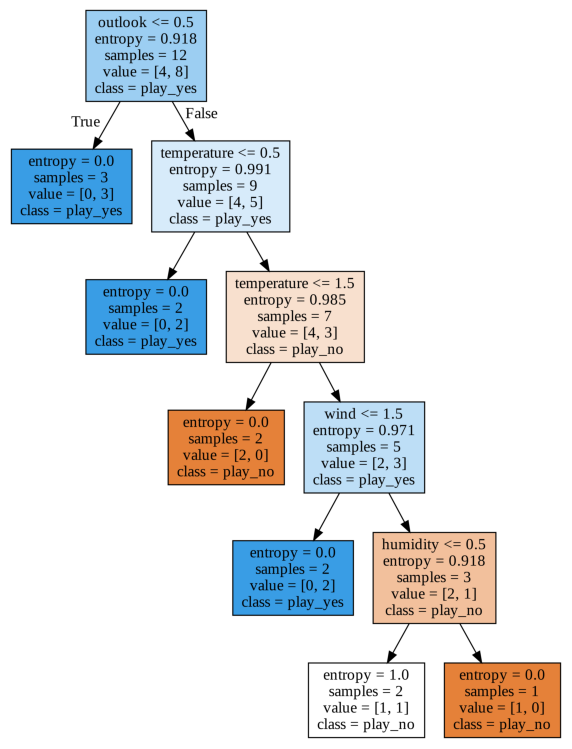

In [ ]:
import tkinter
from sklearn.tree import export_graphviz

export_graphviz( dc, out_file = 'tree_entropy.dot',
               feature_names = [ 'outlook', 'temperature', 'humidity', 'wind' ],
               class_names = [ 'play_no', 'play_yes' ], 
               filled = True)

# Convert to png
from subprocess import call

call( [ 'dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600' ] )

# Display in python
import matplotlib.pyplot as plt

plt.figure( figsize = (10, 15) )
plt.imshow( plt.imread('tree_entropy.png') )
plt.axis('off');
plt.show();